In [338]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('Balaji Fast Food Sales.csv')
df

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
...,...,...,...,...,...,...,...,...,...,...
995,996,3/19/2023,Frankie,Fastfood,50,10,500,NaN,Mrs.,Evening
996,997,9/20/2022,Sandwich,Fastfood,60,7,420,NaN,Mr.,Evening
997,998,1/26/2023,Sandwich,Fastfood,60,13,780,NaN,Mr.,Evening
998,999,8/27/2022,Panipuri,Fastfood,20,5,100,NaN,Mrs.,Afternoon


In [339]:
df.columns

Index(['order_id', 'date', 'item_name', 'item_type', 'item_price', 'quantity',
       'transaction_amount', 'transaction_type', 'received_by',
       'time_of_sale'],
      dtype='object')

In [340]:
df.isnull().sum()

order_id                0
date                    0
item_name               0
item_type               0
item_price              0
quantity                0
transaction_amount      0
transaction_type      107
received_by             0
time_of_sale            0
dtype: int64

In [341]:
df['transaction_type'] = df['transaction_type'].fillna('Cash')
df

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,Cash,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
...,...,...,...,...,...,...,...,...,...,...
995,996,3/19/2023,Frankie,Fastfood,50,10,500,Cash,Mrs.,Evening
996,997,9/20/2022,Sandwich,Fastfood,60,7,420,Cash,Mr.,Evening
997,998,1/26/2023,Sandwich,Fastfood,60,13,780,Cash,Mr.,Evening
998,999,8/27/2022,Panipuri,Fastfood,20,5,100,Cash,Mrs.,Afternoon


In [342]:
a=df[['item_price','quantity','transaction_amount']].copy()
a

,item_price,quantity,transaction_amount
0,20,13,260
1,20,15,300
2,20,1,20
3,25,6,150
4,25,8,200
...,...,...,...
995,50,10,500
996,60,7,420
997,60,13,780
998,20,5,100


In [343]:
a.skew()

item_price            0.625004
quantity             -0.051299
transaction_amount    1.052643
dtype: float64

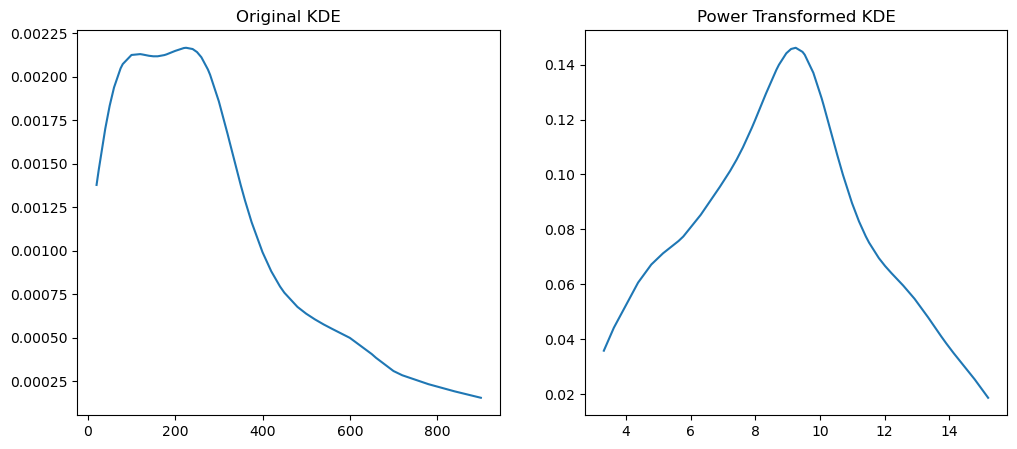

In [344]:
from scipy.stats import gaussian_kde

x = pd.to_numeric(df['transaction_amount'], errors='coerce')

pow_x = np.power(x, 0.4)

kde1 = gaussian_kde(x)
kde2 = gaussian_kde(pow_x)

x_sorted = np.sort(x)
pow_sorted = np.sort(pow_x)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(x_sorted, kde1(x_sorted))
ax1.set_title("Original KDE")

ax2.plot(pow_sorted, kde2(pow_sorted))
ax2.set_title("Power Transformed KDE")

plt.show()

In [345]:
df['transaction_amount'] = np.power(
    pd.to_numeric(df['transaction_amount'], errors='coerce'),
    0.4
)

In [346]:
df['transaction_amount'].skew()

np.float64(0.07448423914945981)

In [347]:
df.isnull().sum()

order_id              0
date                  0
item_name             0
item_type             0
item_price            0
quantity              0
transaction_amount    0
transaction_type      0
received_by           0
time_of_sale          0
dtype: int64

In [348]:
x=df['item_name'].value_counts()
x

item_name
Cold coffee        161
Sugarcane juice    153
Panipuri           150
Frankie            139
Aalopuri           134
Vadapav            134
Sandwich           129
Name: count, dtype: int64

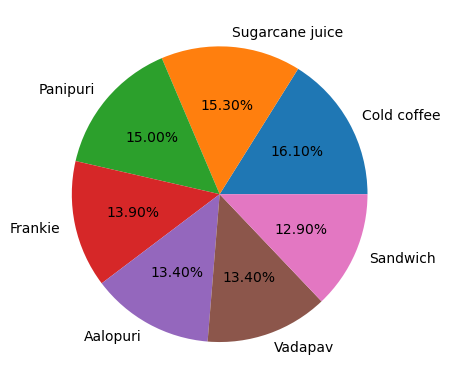

In [349]:
plt.pie(x,labels=x.index,autopct='%1.2f%%')
plt.show()

In [350]:
x=df['time_of_sale'].value_counts()
x

time_of_sale
Night        205
Afternoon    205
Evening      201
Midnight     199
Morning      190
Name: count, dtype: int64

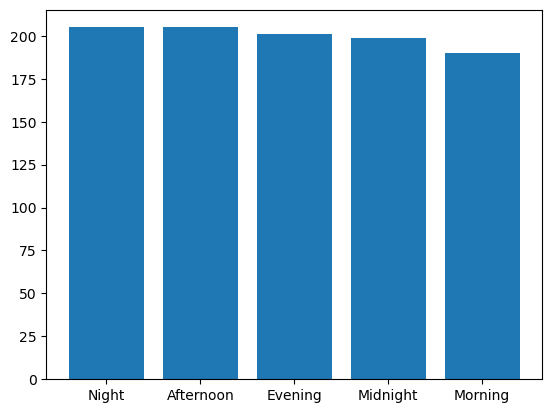

In [351]:
plt.bar(x.index,x)
plt.show()

In [352]:
df

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,9.246755,Cash,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,9.791484,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,3.314454,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,7.420557,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,8.325532,Online,Mr.,Evening
...,...,...,...,...,...,...,...,...,...,...
995,996,3/19/2023,Frankie,Fastfood,50,10,12.011244,Cash,Mrs.,Evening
996,997,9/20/2022,Sandwich,Fastfood,60,7,11.202107,Cash,Mr.,Evening
997,998,1/26/2023,Sandwich,Fastfood,60,13,14.349535,Cash,Mr.,Evening
998,999,8/27/2022,Panipuri,Fastfood,20,5,6.309573,Cash,Mrs.,Afternoon


In [353]:
df['new_date'] = pd.to_datetime(
    df['date'].str.replace('-', '/').str.strip(),
    format='%m/%d/%Y',
    errors='coerce'
)
df

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale,new_date
0,1,07-03-2022,Aalopuri,Fastfood,20,13,9.246755,Cash,Mr.,Night,2022-07-03
1,2,8/23/2022,Vadapav,Fastfood,20,15,9.791484,Cash,Mr.,Afternoon,2022-08-23
2,3,11/20/2022,Vadapav,Fastfood,20,1,3.314454,Cash,Mr.,Afternoon,2022-11-20
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,7.420557,Online,Mr.,Night,2023-02-03
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,8.325532,Online,Mr.,Evening,2022-10-02
...,...,...,...,...,...,...,...,...,...,...,...
995,996,3/19/2023,Frankie,Fastfood,50,10,12.011244,Cash,Mrs.,Evening,2023-03-19
996,997,9/20/2022,Sandwich,Fastfood,60,7,11.202107,Cash,Mr.,Evening,2022-09-20
997,998,1/26/2023,Sandwich,Fastfood,60,13,14.349535,Cash,Mr.,Evening,2023-01-26
998,999,8/27/2022,Panipuri,Fastfood,20,5,6.309573,Cash,Mrs.,Afternoon,2022-08-27


In [354]:
df['month'] = df['new_date'].dt.month_name()
df['year'] = df['new_date'].dt.year
df

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale,new_date,month,year
0,1,07-03-2022,Aalopuri,Fastfood,20,13,9.246755,Cash,Mr.,Night,2022-07-03,July,2022
1,2,8/23/2022,Vadapav,Fastfood,20,15,9.791484,Cash,Mr.,Afternoon,2022-08-23,August,2022
2,3,11/20/2022,Vadapav,Fastfood,20,1,3.314454,Cash,Mr.,Afternoon,2022-11-20,November,2022
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,7.420557,Online,Mr.,Night,2023-02-03,February,2023
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,8.325532,Online,Mr.,Evening,2022-10-02,October,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,3/19/2023,Frankie,Fastfood,50,10,12.011244,Cash,Mrs.,Evening,2023-03-19,March,2023
996,997,9/20/2022,Sandwich,Fastfood,60,7,11.202107,Cash,Mr.,Evening,2022-09-20,September,2022
997,998,1/26/2023,Sandwich,Fastfood,60,13,14.349535,Cash,Mr.,Evening,2023-01-26,January,2023
998,999,8/27/2022,Panipuri,Fastfood,20,5,6.309573,Cash,Mrs.,Afternoon,2022-08-27,August,2022


In [355]:
df_2022 = df[df['year'] == 2022].copy()
df_2023 = df[df['year'] == 2023].copy()

In [356]:
sales_2022 = df_2022.groupby('month').size()
sales_2022

month
April         66
August        90
December      90
July          79
June          68
May          100
November      82
October       98
September     73
dtype: int64

In [357]:
sales_2023 = df_2023.groupby('month').size()
sales_2023


month
February    83
January     90
March       81
dtype: int64

In [358]:
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

In [359]:
sales_2022_sorted = sales_2022.reindex(month_order)
sales_2023_sorted = sales_2023.reindex(month_order)
sales_2022_sorted

month
January        NaN
February       NaN
March          NaN
April         66.0
May          100.0
June          68.0
July          79.0
August        90.0
September     73.0
October       98.0
November      82.0
December      90.0
dtype: float64

In [360]:
sales_2022_sorted = sales_2022_sorted.fillna(0)
sales_2023_sorted = sales_2023_sorted.fillna(0)

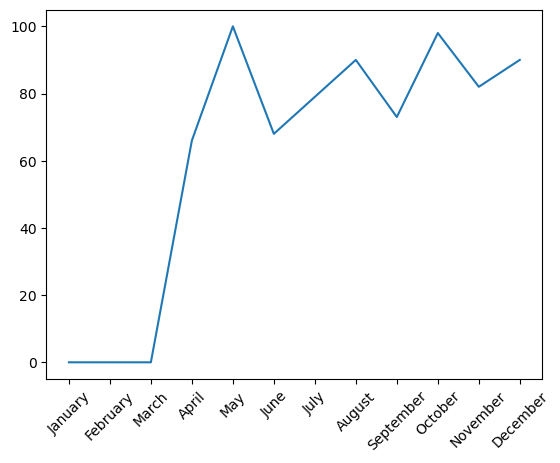

In [361]:
plt.plot(sales_2022_sorted.index,sales_2022_sorted)
plt.xticks(rotation=45)
plt.show()

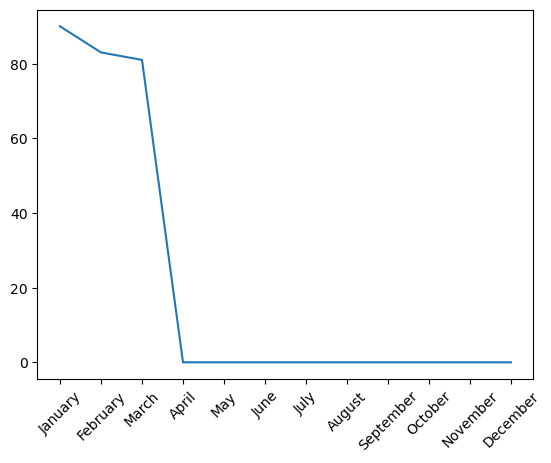

In [362]:
plt.plot(sales_2023_sorted.index,sales_2023_sorted)
plt.xticks(rotation=45)
plt.show()

In [363]:
df

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale,new_date,month,year
0,1,07-03-2022,Aalopuri,Fastfood,20,13,9.246755,Cash,Mr.,Night,2022-07-03,July,2022
1,2,8/23/2022,Vadapav,Fastfood,20,15,9.791484,Cash,Mr.,Afternoon,2022-08-23,August,2022
2,3,11/20/2022,Vadapav,Fastfood,20,1,3.314454,Cash,Mr.,Afternoon,2022-11-20,November,2022
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,7.420557,Online,Mr.,Night,2023-02-03,February,2023
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,8.325532,Online,Mr.,Evening,2022-10-02,October,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,3/19/2023,Frankie,Fastfood,50,10,12.011244,Cash,Mrs.,Evening,2023-03-19,March,2023
996,997,9/20/2022,Sandwich,Fastfood,60,7,11.202107,Cash,Mr.,Evening,2022-09-20,September,2022
997,998,1/26/2023,Sandwich,Fastfood,60,13,14.349535,Cash,Mr.,Evening,2023-01-26,January,2023
998,999,8/27/2022,Panipuri,Fastfood,20,5,6.309573,Cash,Mrs.,Afternoon,2022-08-27,August,2022


In [364]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['item_']=le.fit_transform(df['item_name'])
df

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale,new_date,month,year,item_
0,1,07-03-2022,Aalopuri,Fastfood,20,13,9.246755,Cash,Mr.,Night,2022-07-03,July,2022,0
1,2,8/23/2022,Vadapav,Fastfood,20,15,9.791484,Cash,Mr.,Afternoon,2022-08-23,August,2022,6
2,3,11/20/2022,Vadapav,Fastfood,20,1,3.314454,Cash,Mr.,Afternoon,2022-11-20,November,2022,6
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,7.420557,Online,Mr.,Night,2023-02-03,February,2023,5
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,8.325532,Online,Mr.,Evening,2022-10-02,October,2022,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,3/19/2023,Frankie,Fastfood,50,10,12.011244,Cash,Mrs.,Evening,2023-03-19,March,2023,2
996,997,9/20/2022,Sandwich,Fastfood,60,7,11.202107,Cash,Mr.,Evening,2022-09-20,September,2022,4
997,998,1/26/2023,Sandwich,Fastfood,60,13,14.349535,Cash,Mr.,Evening,2023-01-26,January,2023,4
998,999,8/27/2022,Panipuri,Fastfood,20,5,6.309573,Cash,Mrs.,Afternoon,2022-08-27,August,2022,3


In [365]:
df['time_of_sale'].unique()

array(['Night', 'Afternoon', 'Evening', 'Morning', 'Midnight'],
      dtype=object)

In [366]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['time_encoded']=le.fit_transform(df['time_of_sale'])
df
df

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale,new_date,month,year,item_,time_encoded
0,1,07-03-2022,Aalopuri,Fastfood,20,13,9.246755,Cash,Mr.,Night,2022-07-03,July,2022,0,4
1,2,8/23/2022,Vadapav,Fastfood,20,15,9.791484,Cash,Mr.,Afternoon,2022-08-23,August,2022,6,0
2,3,11/20/2022,Vadapav,Fastfood,20,1,3.314454,Cash,Mr.,Afternoon,2022-11-20,November,2022,6,0
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,7.420557,Online,Mr.,Night,2023-02-03,February,2023,5,4
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,8.325532,Online,Mr.,Evening,2022-10-02,October,2022,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,3/19/2023,Frankie,Fastfood,50,10,12.011244,Cash,Mrs.,Evening,2023-03-19,March,2023,2,1
996,997,9/20/2022,Sandwich,Fastfood,60,7,11.202107,Cash,Mr.,Evening,2022-09-20,September,2022,4,1
997,998,1/26/2023,Sandwich,Fastfood,60,13,14.349535,Cash,Mr.,Evening,2023-01-26,January,2023,4,1
998,999,8/27/2022,Panipuri,Fastfood,20,5,6.309573,Cash,Mrs.,Afternoon,2022-08-27,August,2022,3,0


In [367]:
df = pd.get_dummies(df, columns=['transaction_type'],dtype=int)
df

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,received_by,time_of_sale,new_date,month,year,item_,time_encoded,transaction_type_Cash,transaction_type_Online
0,1,07-03-2022,Aalopuri,Fastfood,20,13,9.246755,Mr.,Night,2022-07-03,July,2022,0,4,1,0
1,2,8/23/2022,Vadapav,Fastfood,20,15,9.791484,Mr.,Afternoon,2022-08-23,August,2022,6,0,1,0
2,3,11/20/2022,Vadapav,Fastfood,20,1,3.314454,Mr.,Afternoon,2022-11-20,November,2022,6,0,1,0
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,7.420557,Mr.,Night,2023-02-03,February,2023,5,4,0,1
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,8.325532,Mr.,Evening,2022-10-02,October,2022,5,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,3/19/2023,Frankie,Fastfood,50,10,12.011244,Mrs.,Evening,2023-03-19,March,2023,2,1,1,0
996,997,9/20/2022,Sandwich,Fastfood,60,7,11.202107,Mr.,Evening,2022-09-20,September,2022,4,1,1,0
997,998,1/26/2023,Sandwich,Fastfood,60,13,14.349535,Mr.,Evening,2023-01-26,January,2023,4,1,1,0
998,999,8/27/2022,Panipuri,Fastfood,20,5,6.309573,Mrs.,Afternoon,2022-08-27,August,2022,3,0,1,0


In [368]:
final=df[['item_price','quantity','item_','time_encoded','transaction_type_Cash','transaction_type_Online','transaction_amount']]
final

,item_price,quantity,item_,time_encoded,transaction_type_Cash,transaction_type_Online,transaction_amount
0,20,13,0,4,1,0,9.246755
1,20,15,6,0,1,0,9.791484
2,20,1,6,0,1,0,3.314454
3,25,6,5,4,0,1,7.420557
4,25,8,5,1,0,1,8.325532
...,...,...,...,...,...,...,...
995,50,10,2,1,1,0,12.011244
996,60,7,4,1,1,0,11.202107
997,60,13,4,1,1,0,14.349535
998,20,5,3,0,1,0,6.309573


In [369]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
cols=['item_price','quantity','item_','time_encoded','transaction_type_Cash','transaction_type_Online']

final[cols]=sc.fit_transform(final[cols])
final

C:\Users\Irfan Ahmed J\AppData\Local\Temp\ipykernel_14864\4088843977.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final[cols]=sc.fit_transform(final[cols])


,item_price,quantity,item_,time_encoded,transaction_type_Cash,transaction_type_Online,transaction_amount
0,-0.892768,1.096836,-1.499169,1.411140,0.845734,-0.845734,9.246755
1,-0.892768,1.550262,1.525382,-1.395702,0.845734,-0.845734,9.791484
2,-0.892768,-1.623717,1.525382,-1.395702,0.845734,-0.845734,3.314454
3,-0.557519,-0.490153,1.021290,1.411140,-1.182405,1.182405,7.420557
4,-0.557519,-0.036727,1.021290,-0.693992,-1.182405,1.182405,8.325532
...,...,...,...,...,...,...,...
995,1.118726,0.416698,-0.490986,-0.693992,0.845734,-0.845734,12.011244
996,1.789225,-0.263440,0.517198,-0.693992,0.845734,-0.845734,11.202107
997,1.789225,1.096836,0.517198,-0.693992,0.845734,-0.845734,14.349535
998,-0.892768,-0.716866,0.013106,-1.395702,0.845734,-0.845734,6.309573


In [370]:
final.skew()

item_price                 0.625004
quantity                  -0.051299
item_                      0.029887
time_encoded               0.019385
transaction_type_Cash     -0.337177
transaction_type_Online    0.337177
transaction_amount         0.074484
dtype: float64

In [371]:
corr=final.corr()

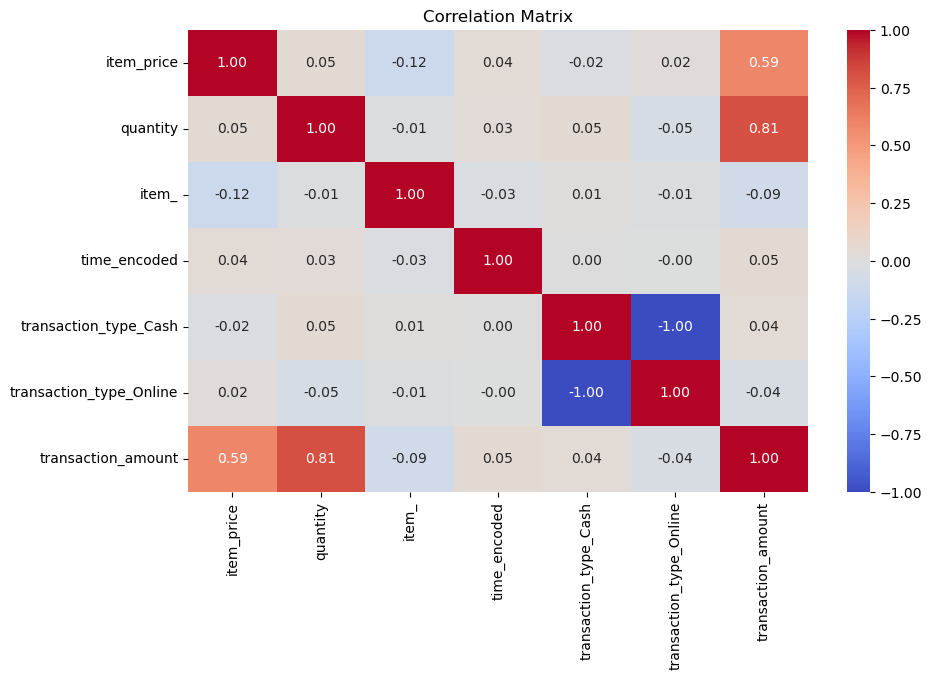

In [372]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()